# Getting Started with xbuoy

This notebook demonstrates the main features of the `xbuoy` package for accessing and analyzing NOAA NDBC buoy data.

In [1]:
import xbuoy
import numpy as np
import matplotlib.pyplot as plt

print(f"xbuoy version: {xbuoy.__version__}")

xbuoy version: 0.1.0


## 1. List Available Stations

Get metadata for all NDBC buoy stations:

In [2]:
# Get all buoy stations
stations = xbuoy.list_stations() #takes a while to pull from NDBC database! 
print(f"Total stations: {len(stations.station_id)}")
stations

Fetching station metadata: 100%|██████████| 897/897 [00:13<00:00, 67.64station/s] 

Total stations: 604


<xarray.Dataset> Size: 29kB
Dimensions:     (station_id: 604)
Coordinates:
  * station_id  (station_id) object 5kB '21346' '21347' ... 'ssbn7' 'vbba3'
Data variables:
    min_year    (station_id) float64 5kB 2.013e+03 2.013e+03 ... 2.016e+03
    max_year    (station_id) float64 5kB 2.016e+03 2.016e+03 ... 2.021e+03
    notes       (station_id) object 5kB 'Data from these stations was discont...
    latitude    (station_id) float64 5kB 40.3 39.6 38.82 ... 35.39 33.84 36.13
    longitude   (station_id) float64 5kB 146.2 145.8 145.6 ... -78.48 -114.4

## 2. Filter Stations by Region

Filter stations to a specific geographic area:

In [3]:
# Filter to Caribbean region
caribbean = xbuoy.list_stations(
    region={'lon_min': -85, 'lon_max': -60, 'lat_min': 10, 'lat_max': 25}
)
print(f"Caribbean stations: {len(caribbean.station_id)}")

Fetching station metadata: 100%|██████████| 897/897 [00:03<00:00, 224.89station/s]

Caribbean stations: 36


## 3. Visualize Station Locations

Plot station locations on a map:

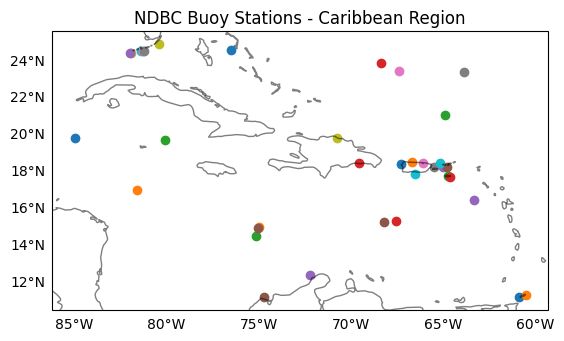

In [4]:
# Plot Caribbean stations
fig, ax = xbuoy.plot_stations(caribbean)
ax.set_title('NDBC Buoy Stations - Caribbean Region')
plt.show()

## 4. Fetch Buoy Data

Download historical observations for specific stations and years:

In [5]:
# Fetch data for a single station
# Note: This will download data from NDBC servers
data = xbuoy.fetch_data(
    station_ids="42095",
    years=range(2000, 2021),
    sample_rate="D"  # Daily averages
)

# Compute data coverage for water temperature
data = xbuoy.compute_data_coverage(data, variable="WTMP")

data

Fetching station metadata: 100%|██████████| 897/897 [00:04<00:00, 203.67station/s] 


<xarray.Dataset> Size: 77kB
Dimensions:        (station_id: 1, time: 685)
Coordinates:
  * time           (time) datetime64[ns] 5kB 2019-02-16 ... 2020-12-31
  * station_id     (station_id) object 8B '42095'
Data variables: (12/16)
    WDIR           (station_id, time) float64 5kB nan nan nan ... nan nan nan
    WSPD           (station_id, time) float64 5kB nan nan nan ... nan nan nan
    GST            (station_id, time) float64 5kB nan nan nan ... nan nan nan
    WVHT           (station_id, time) float64 5kB 0.4714 0.5266 ... 2.06 2.581
    DPD            (station_id, time) float64 5kB 4.107 4.033 ... 7.561 8.123
    APD            (station_id, time) float64 5kB 3.271 3.249 ... 5.546 6.081
    ...             ...
    DEWP           (station_id, time) float64 5kB nan nan nan ... nan nan nan
    VIS            (station_id, time) float64 5kB nan nan nan ... nan nan nan
    TIDE           (station_id, time) float64 5kB nan nan nan ... nan nan nan
    latitude       (station_id) float64 8B 24.41
    longitude      (station_id) float64 8B -81.97
    WTMP_coverage  (station_id) float64 8B 80.15

## 5. Analyze Temperature Data

Compute temperature statistics and visualize:

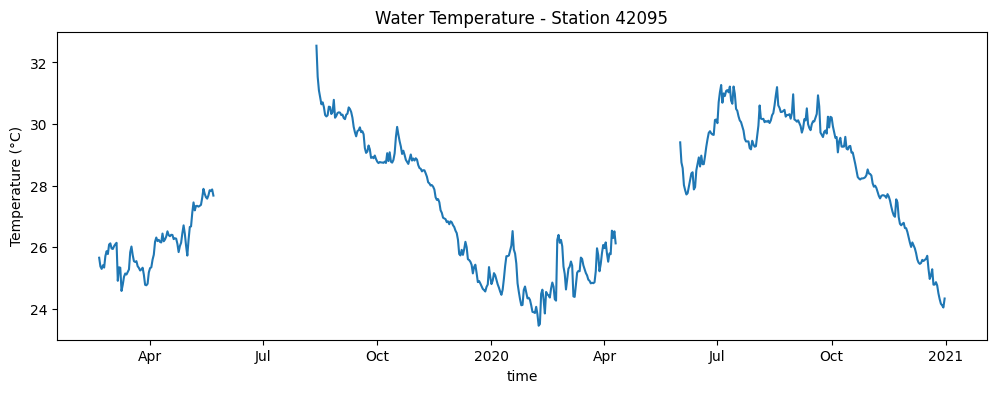

In [6]:
# Plot water temperature time series
plt.figure(figsize=(12, 4))
data["WTMP"].sel(station_id="42095").plot()
plt.title("Water Temperature - Station 42095")
plt.ylabel("Temperature (°C)")
plt.show()

## 6. Working with Multiple Stations

Fetch and analyze data from multiple stations:

In [7]:
# Get station IDs from Caribbean region
station_ids = caribbean.station_id.values[-5:]  # Last 5 stations

# Fetch data for multiple stations
multi_data = xbuoy.fetch_data(
    station_ids=station_ids.tolist(),
    years=range(2000, 2021),
    sample_rate="D"  # Daily averages
)

# Compute data coverage for water temperature
multi_data = xbuoy.compute_data_coverage(multi_data, variable="WTMP")

multi_data

Fetching station metadata: 100%|██████████| 897/897 [00:04<00:00, 215.25station/s]


<xarray.Dataset> Size: 3MB
Dimensions:        (time: 5069, station_id: 5)
Coordinates:
  * time           (time) datetime64[ns] 41kB 2006-04-01 ... 2020-12-31
  * station_id     (station_id) object 40B '42088' '42089' ... '42095' '42407'
Data variables: (12/19)
    WDIR           (station_id, time) float64 203kB nan nan nan ... nan nan nan
    WSPD           (station_id, time) float64 203kB nan nan nan ... nan nan nan
    GST            (station_id, time) float64 203kB nan nan nan ... nan nan nan
    WVHT           (station_id, time) float64 203kB nan nan nan ... nan nan nan
    DPD            (station_id, time) float64 203kB nan nan nan ... nan nan nan
    APD            (station_id, time) float64 203kB nan nan nan ... nan nan nan
    ...             ...
    ss             (station_id, time) float64 203kB nan nan nan ... 0.0 0.0 0.0
    T              (station_id, time) float64 203kB nan nan nan ... 1.0 1.0 1.0
    HEIGHT         (station_id, time) float64 203kB nan nan ... 4.506e+03
    latitude       (station_id) float64 40B 11.3 19.7 18.43 24.41 15.28
    longitude      (station_id) float64 40B -60.52 -80.06 -69.58 -81.97 -68.19
    WTMP_coverage  (station_id) float64 40B 4.084 5.82 5.208 10.83 0.0

## 7. Visualize Data Coverage

Plot stations colored by data coverage percentage:

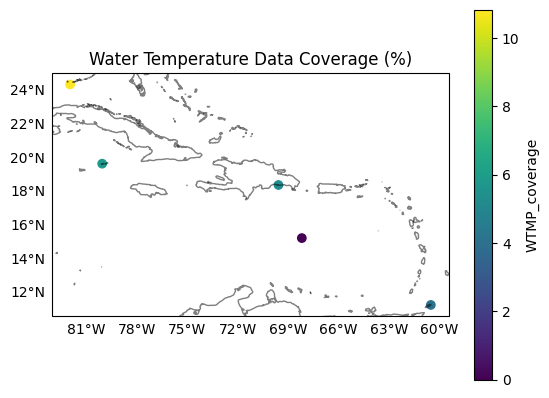

In [8]:
fig, ax = xbuoy.plot_stations(multi_data, variable="WTMP_coverage")
ax.set_title('Water Temperature Data Coverage (%)')
plt.show()

## 8. Visualize multiple stations

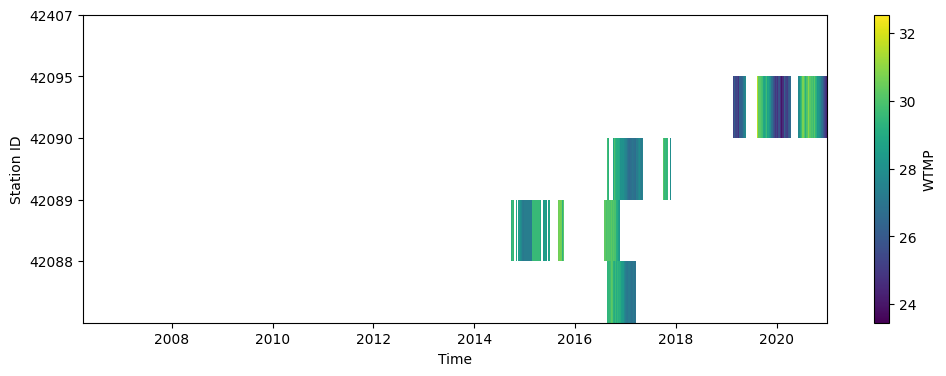

In [9]:
station_idx = np.arange(len(multi_data["WTMP"].station_id))

plt.figure(figsize=(12, 4))
plt.pcolormesh(multi_data["WTMP"].time, station_idx, multi_data["WTMP"], cmap="viridis", shading="auto")
plt.yticks(station_idx + 0.5, multi_data["WTMP"].station_id.values)
plt.xlabel("Time"); plt.ylabel("Station ID"); plt.colorbar(label="WTMP")
plt.show()